In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
import pandas as pd.
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
import os

In [ ]:
data_dir = '/content/drive/MyDrive/PlantDisease/Data'
categories = os.listdir(data_dir)

#load images and labels
images = []
labels = []

for category in categories:
    print(category)
    folder_path = os.path.join(data_dir, category)
    for image_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_name)
        img = cv2.imread(image_path)
        if img is not None:
            img = cv2.resize(img, (64 , 64))
            images.append(img)
            labels.append(category)

#convert images and labels to numpy arrays
images = np.array(images)

Tomato___Late_blight
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___Tomato_mosaic_virus
Tomato___Target_Spot
Tomato___healthy


In [ ]:
#convert to numpy arrays
x = np.array(images)
y = np.array(labels)

print("Labels: ",np.unique(y))
print("Data Shape: ",x.shape)

Labels:  ['Tomato___Late_blight' 'Tomato___Target_Spot'
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus' 'Tomato___Tomato_mosaic_virus'
 'Tomato___healthy']
Data Shape:  (7931, 64, 64, 3)


Class Distribution
Tomato___Tomato_Yellow_Leaf_Curl_Virus    1961
Tomato___Late_blight                      1861
Tomato___Target_Spot                      1827
Tomato___Tomato_mosaic_virus              1793
Tomato___healthy                           489
Name: count, dtype: int64


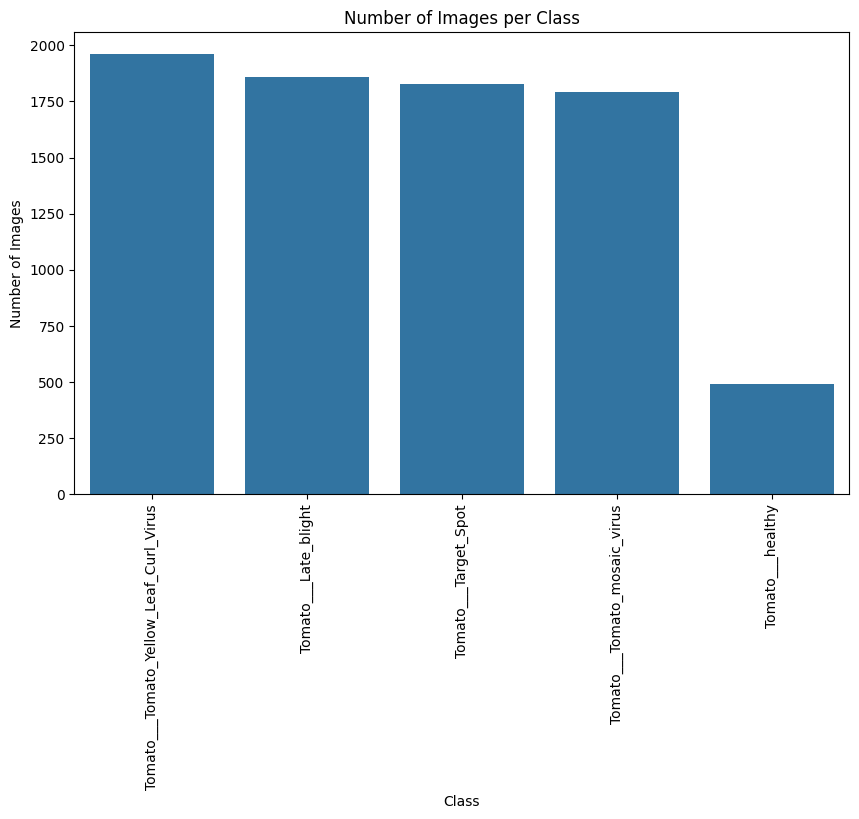

In [ ]:
class_counts = pd.Series(y).value_counts()
print("Class Distribution")
print(class_counts)

#plot class sistribution
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xticks(rotation=90)
plt.title("Number of Images per Class")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()

In [ ]:
#remove corrupt image()
valid_images = []
valid_labels= []

for img,label in zip(x,y):
  if img.shape == (64,64,3):
    valid_images.append(img)
    valid_labels.append(label)

x = np.array(valid_images)
y = np.array(valid_labels)

print("Cleaned Data Shape:", x.shape)

Cleaned Data Shape: (7931, 64, 64, 3)


In [ ]:
#Encode labels
le = LabelEncoder()
y_encode = le.fit_transform(y)

#save class name
clss_names = le.classes_
print(clss_names)

['Tomato___Late_blight' 'Tomato___Target_Spot'
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus' 'Tomato___Tomato_mosaic_virus'
 'Tomato___healthy']


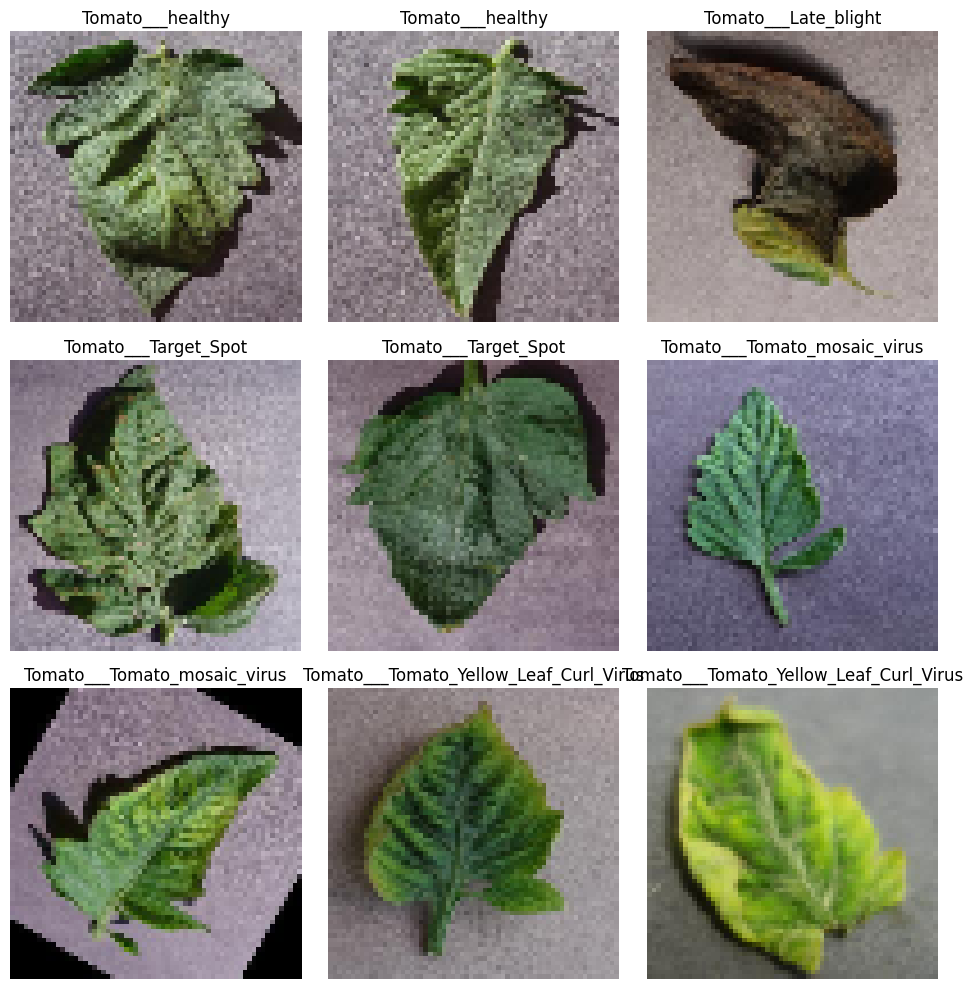

In [ ]:
import random
import cv2
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(9):
  idx = random.randint(0, len(x)-1)
  plt.subplot(3, 3, i+1)
  plt.imshow(cv2.cvtColor(x[idx], cv2.COLOR_BGR2RGB))
  plt.title(clss_names[y_encode[idx]])
  plt.axis('off')
  plt.tight_layout()
plt.show()

In [ ]:
def extract_color_histogram(image, bins=(8, 8, 8)):

  image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
  hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
  hist = cv2.normalize(hist, hist).flatten()
  return hist

hist_features = [extract_color_histogram(img) for img in x]
x_features = np.array(hist_features)

In [ ]:
x_features.shape

(7931, 512)

In [ ]:
model = SVC(kernel='rbf', C=10)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_features, y_encode, test_size=0.2, random_state=42)

model.fit(x_train, y_train)

y_pred=model.predict(x_test)

Accuracy: 0.9779458097038437
F1 Score 0.9779053639545464


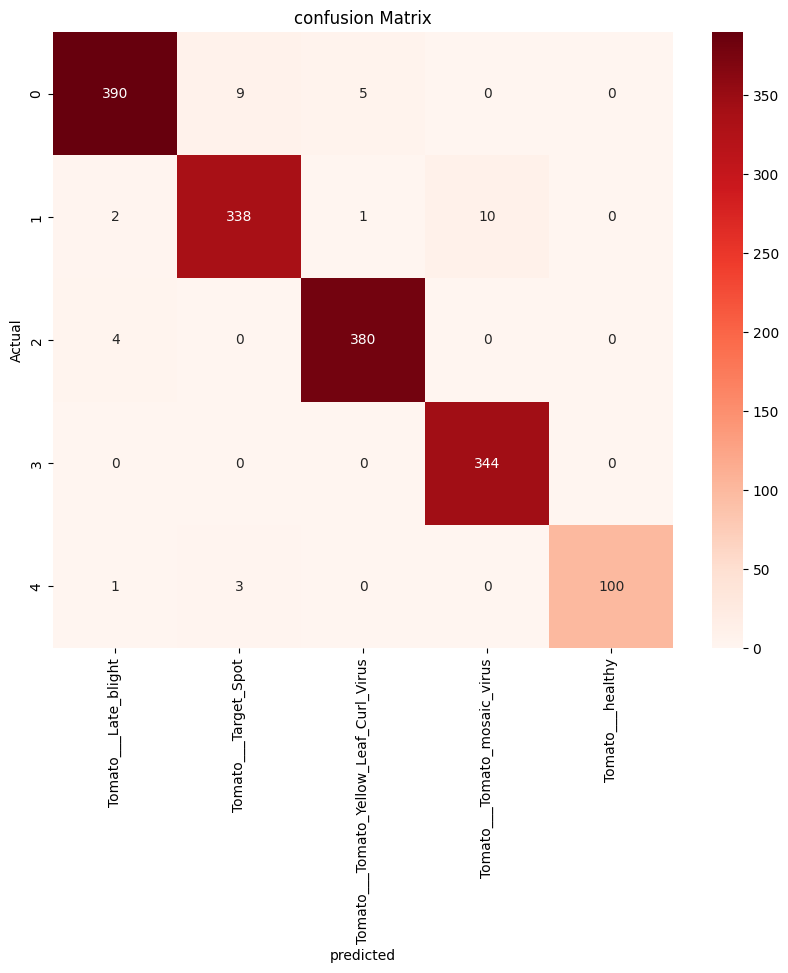

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)


f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score", f1)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',xticklabels=clss_names)
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.title("confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=clss_names))

Classification Report:
                                        precision    recall  f1-score   support

                  Tomato___Late_blight       0.98      0.97      0.97       404
                  Tomato___Target_Spot       0.97      0.96      0.96       351
Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.98      0.99      0.99       384
          Tomato___Tomato_mosaic_virus       0.97      1.00      0.99       344
                      Tomato___healthy       1.00      0.96      0.98       104

                              accuracy                           0.98      1587
                             macro avg       0.98      0.98      0.98      1587
                          weighted avg       0.98      0.98      0.98      1587

